## Profit Curves
---
**Elo notes**

ROC Curves alone assume an equal cost due to
misclassification, however:

* Different kinds of errors have different costs 
* Correct classifications could also have different benefits

**Profit Curves** allow us to compare models and select the one that will maximize profit for a specified cost-benefit

#### Cost–benefit analysis

Cost–benefit analysis (CBA), sometimes called benefit–cost analysis (BCA), is a systematic approach to estimating the strengths and weaknesses of alternatives (for example in transactions, activities, functional business requirements); it is used to determine options that provide the best approach to achieve benefits while preserving savings.

Broadly, CBA has two main purposes:

* To determine if an investment/decision is sound (justification/feasibility) – verifying whether its benefits outweigh the costs, and by how much;

* To provide a basis for comparing projects – which involves comparing the total expected cost of each option against its total expected benefits

CBA is related to, but distinct from cost-effectiveness analysis. In CBA, benefits and costs are expressed in monetary terms, and are adjusted for the time value of money, so that all flows of benefits and flows of project costs over time (which tend to occur at different points in time) are expressed on a common basis in terms of their net present value.

Closely related, but slightly different, formal techniques include cost-effectiveness analysis, cost–utility analysis, risk–benefit analysis, economic impact analysis, fiscal impact analysis, and social return on investment (SROI) analysis.

Cost–benefit analysis is often used by organizations to appraise the desirability of a given policy. It is an analysis of the expected balance of benefits and costs, including an account of foregone alternatives and the status quo. CBA helps predict whether the benefits of a policy outweigh its costs, and by how much relative to other alternatives, so that one can rank alternate policies in terms of the cost–benefit ratio. Generally, accurate cost–benefit analysis identifies choices that increase welfare from a utilitarian perspective. Assuming an accurate CBA, changing the status quo by implementing the alternative with the lowest cost–benefit ratio can improve Pareto efficiency. While CBA can offer a well-educated estimate of the best alternative – perfect appraisal of all present and future costs and benefits is difficult –, perfection in terms of economic efficiency and social welfare are not guaranteed

#### Biasing a Classification Model

Costs, prior probabilities, and class weights are methods for biasing classification models.
Costs

A cost matrix is a mechanism for influencing the decision making of a model. A cost matrix can cause the model to minimize costly misclassifications. It can also cause the model to maximize beneficial accurate classifications.

For example, if a model classifies a customer with poor credit as low risk, this error is costly. A cost matrix could bias the model to avoid this type of error. The cost matrix might also be used to bias the model in favor of the correct classification of customers who have the worst credit history.

ROC is a useful metric for evaluating how a model behaves with different probability thresholds. You can use ROC to help you find optimal costs for a given classifier given different usage scenarios. You can use this information to create cost matrices to influence the deployment of the model.

#### Costs Versus Accuracy

Like a confusion matrix, a cost matrix is an n-by-n matrix, where n is the number of classes. Both confusion matrices and cost matrices include each possible combination of actual and predicted results based on a given set of test data.

A confusion matrix is used to measure accuracy, the ratio of correct predictions to the total number of predictions. A cost matrix is used to specify the relative importance of accuracy for different predictions. In most business applications, it is important to consider costs in addition to accuracy when evaluating model quality. (See "Confusion Matrix".)

#### Positive and Negative Classes

The positive class is the class that you care the most about. Designation of a positive class is required for computing lift and ROC. (See "Lift" and "Receiver Operating Characteristic (ROC)").

In the confusion matrix, the value 1 is designated as the positive class. This means that the creator of the model has determined that it is more important to accurately predict customers who will increase spending with an affinity card (affinity_card=1) than to accurately predict non-responders (affinity_card=0). If you give affinity cards to some customers who are not likely to use them, there is little loss to the company since the cost of the cards is low. However, if you overlook the customers who are likely to respond, you miss the opportunity to increase your revenue.

The true and false positive rates in this confusion matrix are:

False positive rate — $10/(10 + 725) =.01$

True positive rate — $516/(516 + 25) =.95$


**Assigning Costs and Benefits**

In a cost matrix, positive numbers (costs) can be used to influence negative outcomes. Since negative costs are interpreted as benefits, negative numbers (benefits) can be used to influence positive outcomes.

Suppose you have calculated that it costs your business $1500$ when you do not give an affinity card to a customer who would increase spending. Using the model with the confusion matrix, each false negative (misclassification of a responder) would cost $1500$. Misclassifying a non-responder is less expensive to your business. You figure that each false positive (misclassification of a non-responder) would only cost $300$.

You want to keep these costs in mind when you design a promotion campaign. You estimate that it will cost $10$ to include a customer in the promotion. For this reason, you associate a benefit of $10$ with each true negative prediction, because you can simply eliminate those customers from your promotion. Each customer that you eliminate represents a savings of $10$. In your cost matrix, you would specify this benefit as -10, a negative cost.

In [11]:
from __future__ import division

from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.svm import SVC

from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
df_source = pd.read_csv('data/churn_sample.csv')

In [13]:
df_source[:2].T

,0,1
State,KS,OH
Account Length,128,107
Area Code,415,415
Phone,382-4657,371-7191
Int'l Plan,no,no
VMail Plan,yes,yes
VMail Message,25,26
Day Mins,265.1,161.6
Day Calls,110,123
Day Charge,45.07,27.47


In [14]:
dropcols = ['Phone', 'Area Code', 'State']
df = df_source.drop(dropcols, axis=1)

In [15]:
df['Churn?'] = df['Churn?'].map({'False.':False, "True.":True})
df["Int'l Plan"]=df["Int'l Plan"].map({'yes': True,'no':False})
df["VMail Plan"] = df["VMail Plan"].map({'yes': True,'no':False})

In [16]:
def cmatrix(y_truth, y_prediction):
    y_truth, y_prediction = np.array(y_truth), np.array(y_prediction)
    
    tp = np.sum((y_truth == y_prediction) & (y_truth == 1))
    tn = np.sum((y_truth == y_prediction) & (y_truth == 0))
    fp = np.sum((y_truth != y_prediction) & (y_prediction == 1))
    fn = np.sum((y_truth != y_prediction) & (y_prediction == 0))

    
    return np.array([[tp, fp], [fn, tn]])
    

In [17]:
y_true = [1, 1, 1, 1, 1, 1, 0]
y_predict = [1, 1, 1, 1, 0, 1, 0]

cmatrix(y_true, y_predict)

array([[5, 0],
       [1, 1]])

In [18]:
# sklearn confusion matrix
confusion_matrix(y_true, y_predict)

array([[1, 0],
       [1, 5]])

In [19]:
# In order to obtain this format ([[tp, fp], [fn, tn]]) we need to add .T
confusion_matrix(y_true,y_predict, labels=[1,0]).T

array([[5, 0],
       [1, 1]])

In [20]:
def profit_curve(cost_benefit, predicted_probabilities, labels):
    profits = []
    percentages = []
    sorted_probabilities = sorted(predicted_probabilities, reverse=True)
    for threshold in sorted_probabilities:
        predicting = (predicted_probabilities > threshold).astype(int)
        cm = confusion_matrix(labels, predicting, labels=[1,0]).T
        profits.append(np.sum(cost_benefit * cm)* 1. / len(labels))
        percentages.append(cm.sum(axis=1)[0]/cm.sum())
    return profits, percentages

In [21]:
probas = np.array([0.2, 0.6, 0.4])
labels = np.array([0, 0, 1])
cb = np.array([[6, -3], [0, 0]])

In [22]:
profit_curve(cb, probas, labels)

([0.0, -1.0, 1.0], [0.0, 0.33333333333333331, 0.66666666666666663])

In [23]:
y = df.pop('Churn?').values
feature_names = df.columns
X = df.values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
def plot_profit_curve(model, cost_benefit, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    model_name = model.__class__.__name__.replace('Regressor', '')
    
    y_predicted_probabilities = model.predict_proba(X_test)[:,1]
    
    profits, percentages = profit_curve(cost_benefit, y_predicted_probabilities, y_test)
    
    plt.plot(percentages, profits, label=model_name)
    plt.xlabel('Percentage predicted as positive')
    plt.ylabel('profit')
    plt.legend(loc='lower right')
    
    return profits, percentages

In [34]:
def plot_profit_curve_(model, cost_benefit, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    model_name = model.__class__.__name__.replace('Regressor', '')
    
    y_predicted_probabilities = model.predict_proba(X_test)[:,1]
    
    profits, percentages = profit_curve(cost_benefit, y_predicted_probabilities, y_test)
    
    plt.plot(percentages, profits, label=model_name)
    plt.xlabel('Percentage predicted as positive')
    plt.ylabel('profit')
    plt.legend(loc='lower right')
    

In [28]:
cost_benefit_ = np.array([[6, -3], [0, 0]])

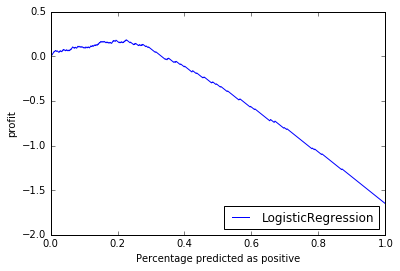

In [35]:
plot_profit_curve_(LogisticRegression(),cost_benefit_, X_train, X_test, y_train, y_test)

Max Profit RandomForestClassifier: 0.579136690647
At Percentage RandomForestClassifier: 0.112709832134
------
Max Profit LogisticRegression: 0.18345323741
At Percentage LogisticRegression: 0.226618705036
------
Max Profit GradientBoostingClassifier: 0.571942446043
At Percentage GradientBoostingClassifier: 0.154676258993
------
Max Profit SVC: 0.0
At Percentage SVC: 0.0
------


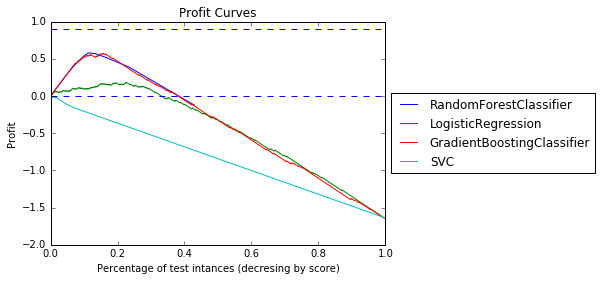

In [38]:
models = [RF(), LR(), GBC(), SVC(probability=True)]

for model in models:
    profits, percentages = plot_profit_curve(model, cost_benefit_, X_train, X_test, y_train, y_test)
    print 'Max Profit {}: {}'.format(model.__class__.__name__, np.max(profits))
    print 'At Percentage {}: {}'.format(model.__class__.__name__, percentages[np.argmax(np.array(profits))])
    print '------'
    
plt.axhline(.9, ls='--')
plt.axhline(0, ls='--')
plt.title('Profit Curves')
plt.xlabel('Percentage of test intances (decresing by score)')
plt.ylabel('Profit')
plt.legend(loc='center left', bbox_to_anchor=[1, .5])
plt.show()

It appears that GradientBoosting classifier achieves the highest profit per transaction at 0.58 while targeting 15% of the customers.

Note: Cost benefit matrix only targets people who were predicted positive.